In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dfap = pd.read_csv("EDACaseStudy/application_data.csv") # Loading Application Data

In [3]:
len(dfap.columns)

122

In [4]:
dfap.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dfp = pd.read_csv("EDACaseStudy/previous_application.csv") #Loading Previous Application Data

In [6]:
dfp.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [7]:
descr = pd.read_csv("EDACaseStudy/columns_description.csv",encoding="Latin")

In [8]:
descr.head(2) #Loading Column Descriptions for reference


,SLN,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN


In [9]:
descr.columns

Index(['SLN', 'Table', 'Row', 'Description', 'Special'], dtype='object')

In [10]:
descr.loc[descr["Special"].notnull(),"Special"][:5]

16                              normalized 
17    time only relative to the application
18    time only relative to the application
19    time only relative to the application
20    time only relative to the application
Name: Special, dtype: object

In [11]:
INCOMECAT=pd.cut(dfap["AMT_INCOME_TOTAL"],bins=[20000,50000,100000,200000,300000,400000,500000,600000,700000,800000,900000,
                                          1000000,1100000,1200000,2000000,3000000,4000000,10000000,120000000],right=False)

In [12]:
#CAT

In [13]:
ICAT=INCOMECAT.value_counts(ascending=True)

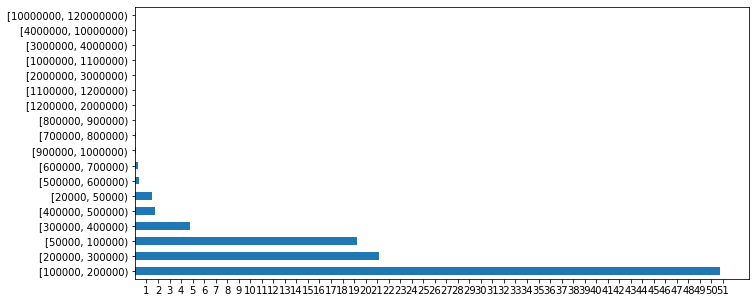

In [14]:
round(ICAT.sort_values(ascending=False)/ICAT.sum()*100,3).plot(kind="barh",figsize=(11,5),xticks=range(1,52,1))

In [15]:
round(ICAT.sort_values(ascending=False)/ICAT.sum()*100,2)[:5]

[100000, 200000)    50.70
[200000, 300000)    21.19
[50000, 100000)     19.25
[300000, 400000)     4.77
[400000, 500000)     1.74
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0.5, 1.0, 'Top 5 Income Category Resposible for  95 % Cases / Applications')

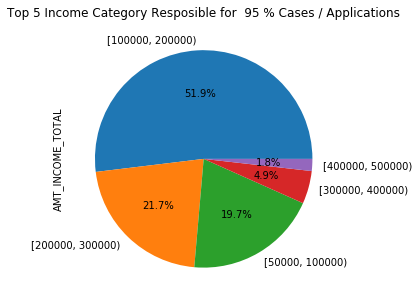

In [16]:
round(ICAT.sort_values(ascending=False)/ICAT.sum()*100,3)[:5].plot(kind="pie",figsize=(9,5),autopct='%1.1f%%')
plt.title("Top 5 Income Category Resposible for  95 % Cases / Applications")

In [17]:
tg = dfap["TARGET"].value_counts()

Text(0.5, 1.0, 'Proof of Imbalance or class 0 and 1')

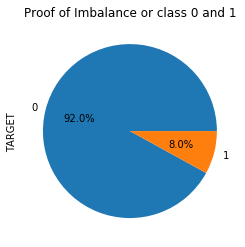

In [18]:
round(tg/tg.sum()*100,0).plot(kind="pie",autopct='%1.1f%%')
plt.title("Proof of Imbalance or class 0 and 1")
# only 8 % cases have payment difficulty and other 92 % cases are on time payment cases
# There is clear cut majority class that is 0 (92%) which is hallmark of imbalance data set

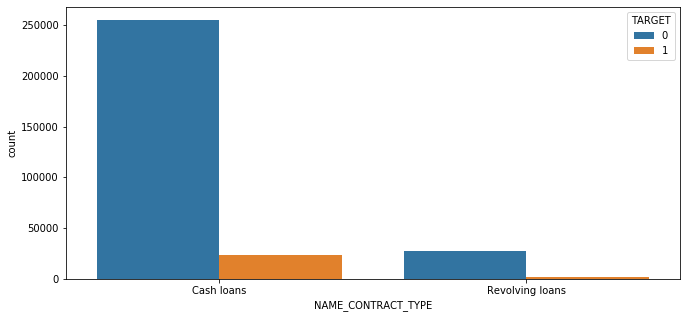

In [19]:
plt.figure(figsize=(11,5))
sns.countplot(dfap["NAME_CONTRACT_TYPE"],hue=dfap["TARGET"])

In [20]:
dfap["CAT"]=INCOMECAT

In [21]:
df=dfap[["TARGET","CAT","AMT_INCOME_TOTAL"]]

In [22]:
df.head()

,TARGET,CAT,AMT_INCOME_TOTAL
0,1,"[200000, 300000)",202500.0
1,0,"[200000, 300000)",270000.0
2,0,"[50000, 100000)",67500.0
3,0,"[100000, 200000)",135000.0
4,0,"[100000, 200000)",121500.0


In [23]:
indexer=df.pivot_table(columns="TARGET",index="CAT",values="AMT_INCOME_TOTAL",
               aggfunc="count",fill_value=0).sum(1).argsort()

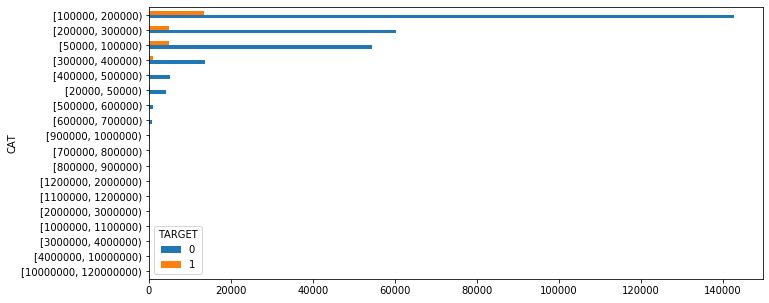

In [24]:
df.pivot_table(columns="TARGET",index="CAT",values="AMT_INCOME_TOTAL",
               aggfunc="count",fill_value=0).take(indexer).plot(kind="barh",figsize=(11,5))

In [25]:
dfap1 = dfap[dfap["TARGET"]==1] # SPLITING THE DATA Between two classes 0 and 1 in TARGET column
dfap2 = dfap[dfap["TARGET"]==0]

In [26]:
#plt.figure(figsize=(15,7))

#sns.heatmap(dfap1.corr())

In [27]:
from pandas.api.types import is_numeric_dtype

In [28]:
cols = dfap1.columns

In [29]:
selected = []
for col in cols:
    if is_numeric_dtype(dfap1[col]):
        selected.append(col)

In [30]:
study = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

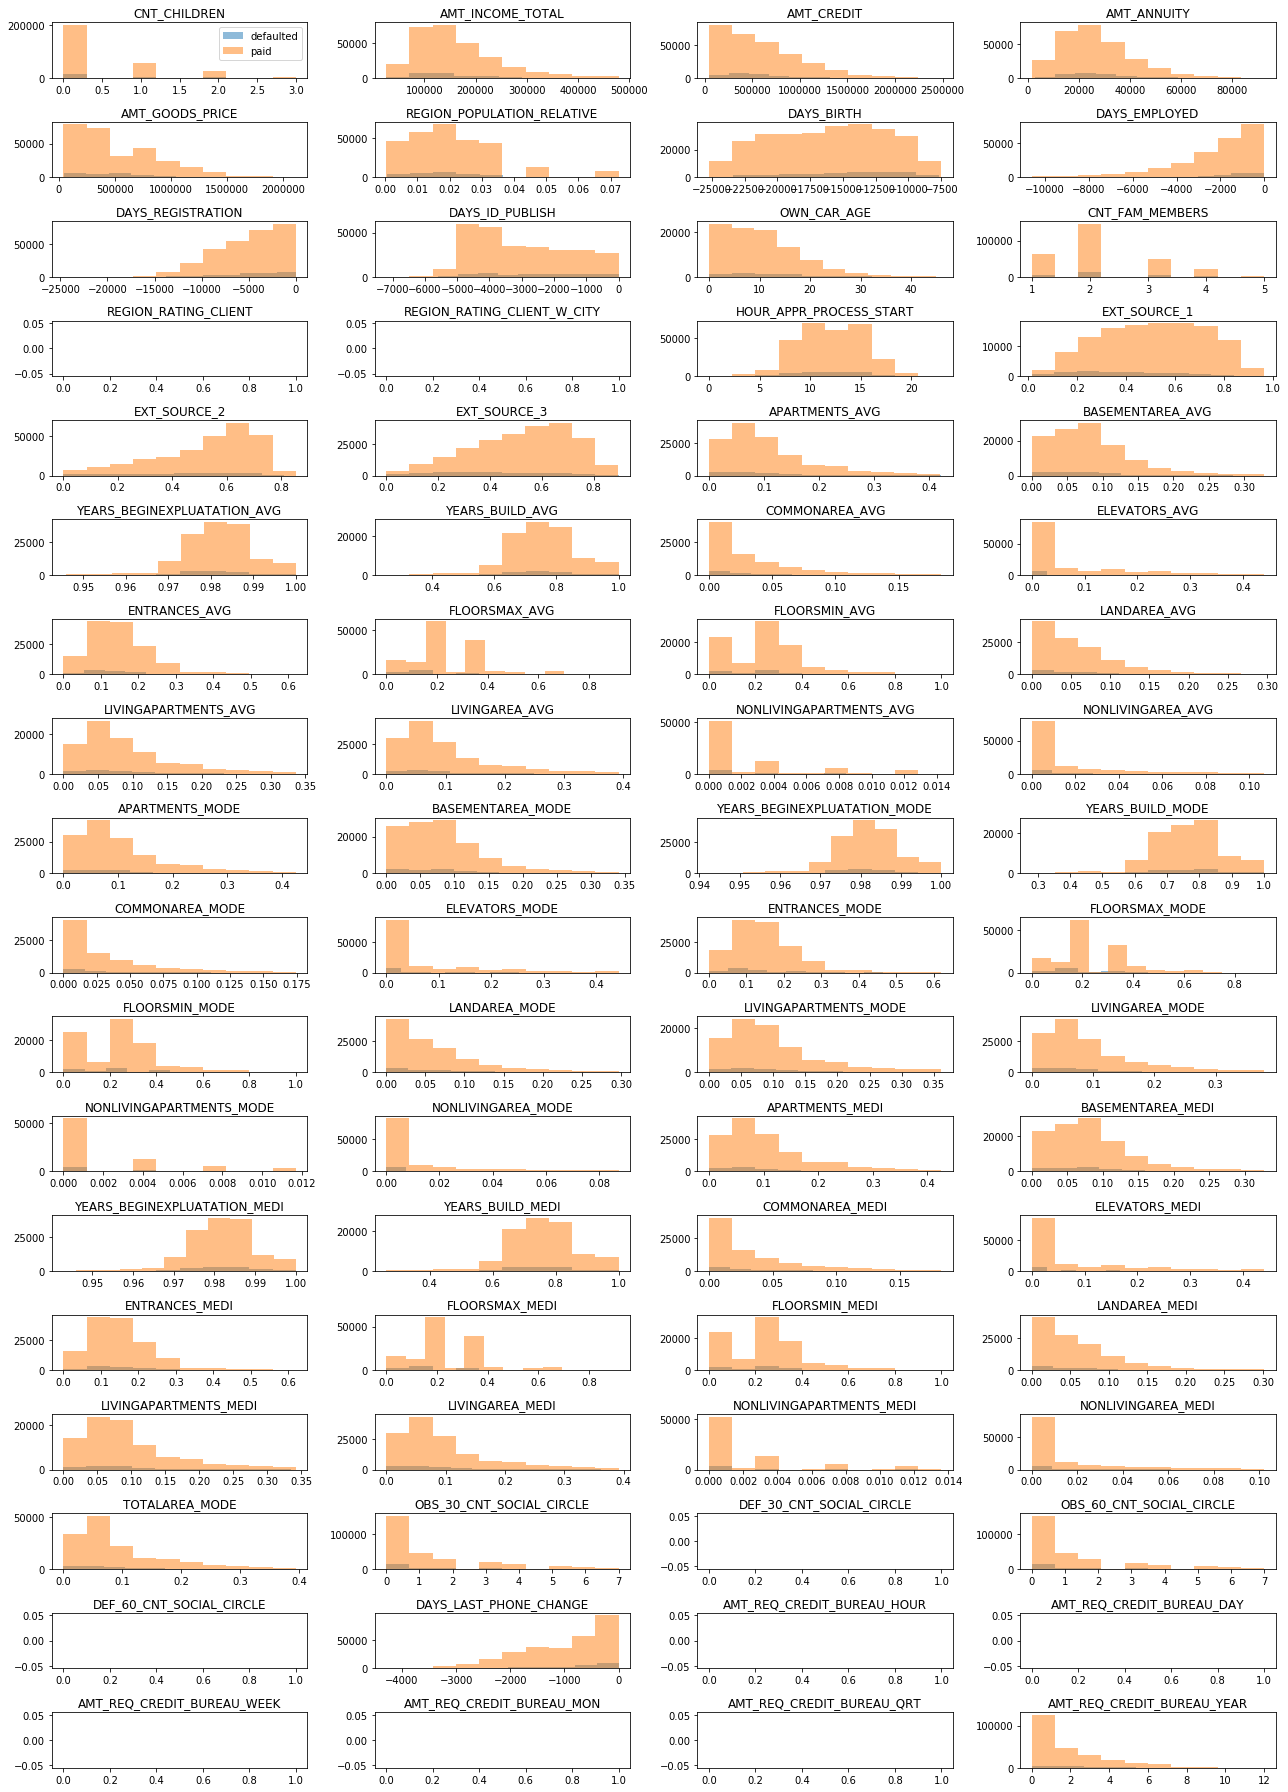

In [31]:
fig,axes=plt.subplots(18,4,figsize=(18,25))
ax=axes.ravel()
for i,col in zip(range(72),study):
    quartiles = np.percentile(dfap1[col].dropna(),[25,50,75])
    mu = quartiles[1]
    sig = 0.74*(quartiles[2]-quartiles[0])
    
    cola=dfap1[(dfap1[col]>(mu -5*sig)) & (dfap1[col]< (mu + 5*sig))][col]
    ax[i].hist(cola,alpha=.5,label="defaulted")
    quartiles = np.percentile(dfap2[col].dropna(),[25,50,75])
    
    mu = quartiles[1]
    sig = 0.74*(quartiles[2]-quartiles[0])
    colb=dfap2[(dfap2[col]>(mu -5*sig)) & (dfap2[col]< (mu + 5*sig))][col]
    ax[i].hist(colb,alpha=.5,label="paid")
    ax[i].set_title(col)
ax[0].legend()    
fig.tight_layout()

In [32]:
len(study)

72

In [33]:
#is_numeric_dtype(dfap1["CNT_CHILDREN"])

In [34]:
dfp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
dfpsel =dfp[['SK_ID_PREV', 'SK_ID_CURR','NAME_CONTRACT_STATUS','DAYS_DECISION','CODE_REJECT_REASON']]

In [36]:
dfpsel.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON
0,2030495,271877,Approved,-73,XAP
1,2802425,108129,Approved,-164,XAP
2,2523466,122040,Approved,-301,XAP
3,2819243,176158,Approved,-512,XAP
4,1784265,202054,Refused,-781,HC


In [37]:
np.unique(dfpsel["CODE_REJECT_REASON"])

array(['CLIENT', 'HC', 'LIMIT', 'SCO', 'SCOFR', 'SYSTEM', 'VERIF', 'XAP',
       'XNA'], dtype=object)

In [38]:
np.unique(dfpsel["NAME_CONTRACT_STATUS"])

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

In [39]:
rej ={'CLIENT':0, 'HC':1, 'LIMIT':2, 'SCO':3, 'SCOFR':4, 'SYSTEM':5, 'VERIF':6, 'XAP':7,
       'XNA':8}

In [40]:
status = {'Approved':0, 'Canceled':1, 'Refused':2, 'Unused offer':3}

In [41]:
dfpsel["rejcd"]=dfpsel["CODE_REJECT_REASON"].map(rej)
dfpsel["statuscd"]=dfpsel["NAME_CONTRACT_STATUS"].map(status)

In [42]:
dfpsel.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,rejcd,statuscd
0,2030495,271877,Approved,-73,XAP,7,0
1,2802425,108129,Approved,-164,XAP,7,0
2,2523466,122040,Approved,-301,XAP,7,0
3,2819243,176158,Approved,-512,XAP,7,0
4,1784265,202054,Refused,-781,HC,1,2


In [43]:
df_final = pd.merge(dfap,dfpsel,left_on="SK_ID_CURR",right_on="SK_ID_CURR",how="left")

In [44]:
df_final.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAT,SK_ID_PREV,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,rejcd,statuscd
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,"[200000, 300000)",1038818.0,Approved,-606.0,XAP,7.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,"[200000, 300000)",1810518.0,Approved,-746.0,XAP,7.0,0.0


In [45]:
study1 = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
  'DAYS_DECISION',      
     'rejcd',
       'statuscd'  ]

In [46]:
len(study1)

72

In [47]:
dfap3 = df_final[df_final["TARGET"]==1] # SPLITING THE DATA Between two classes 0 and 1 in TARGET column
dfap4 = df_final[df_final["TARGET"]==0]

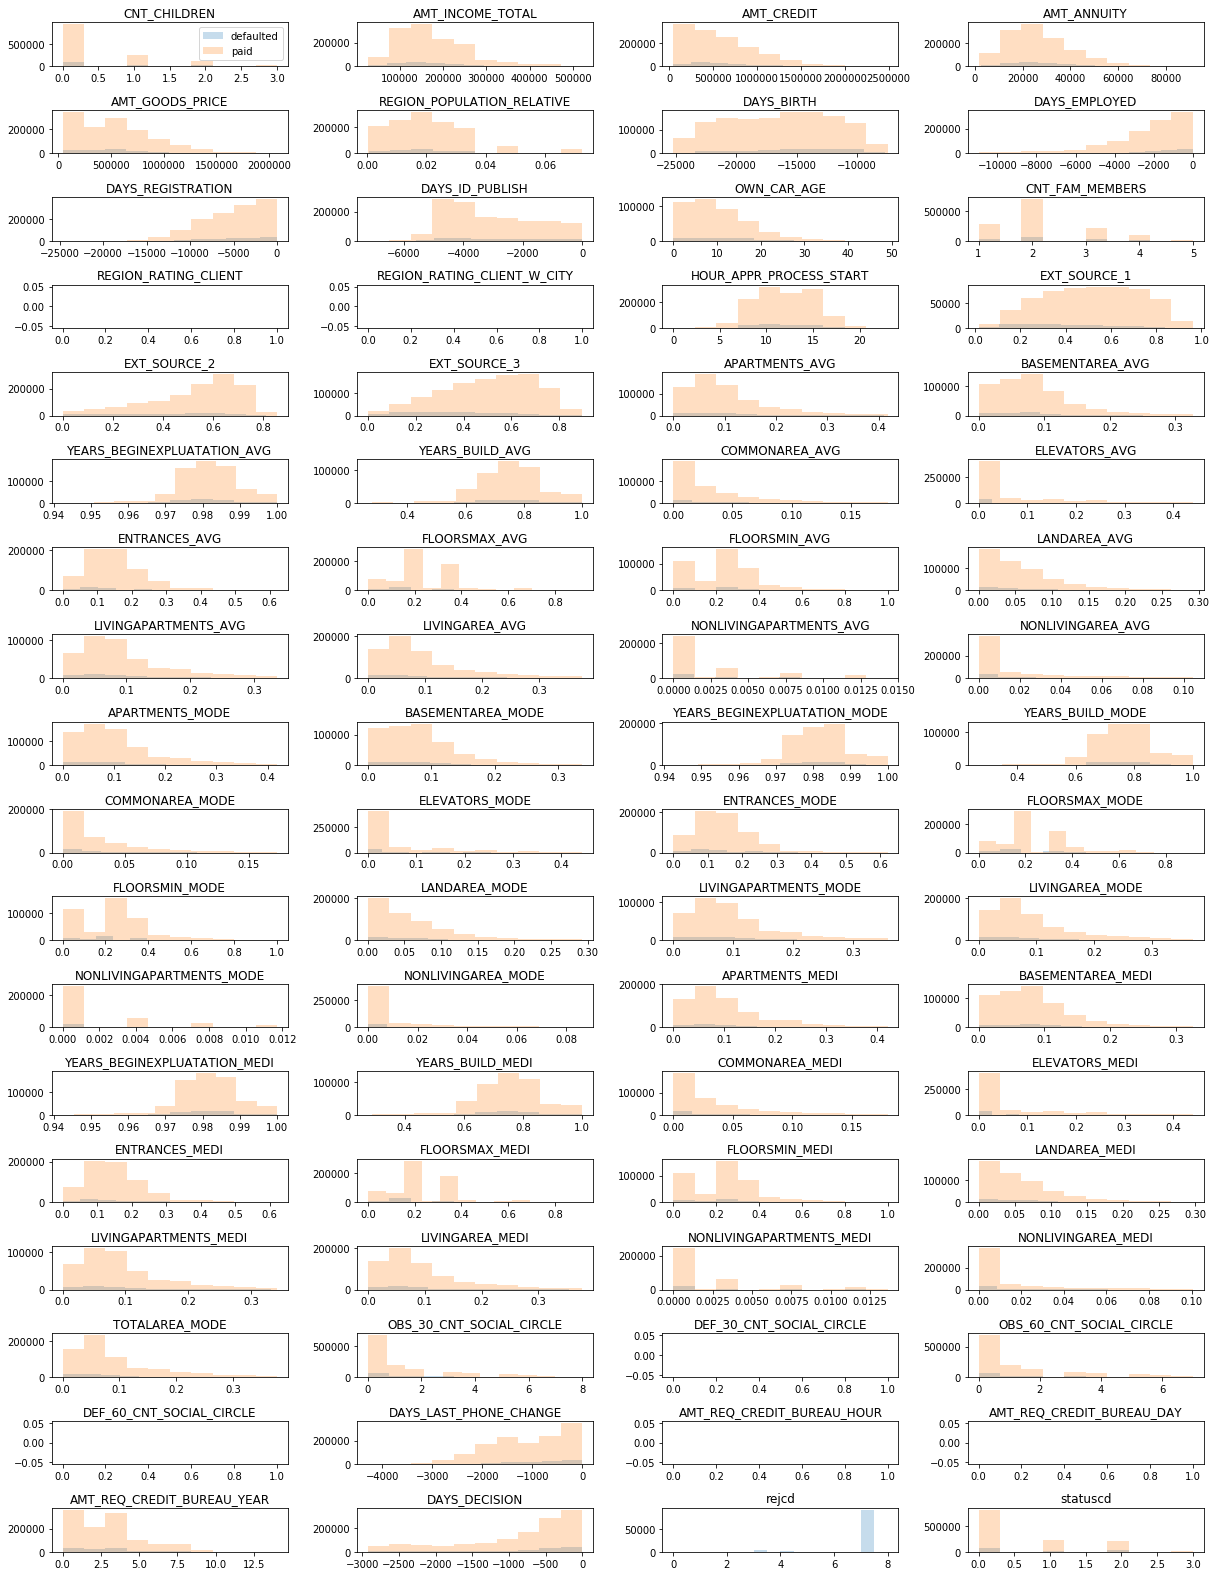

In [48]:
fig,axes=plt.subplots(18,4,figsize=(17,22))
ax=axes.ravel()
for i,col in zip(range(72),study1):
    quartiles = np.percentile(dfap3[col].dropna(),[25,50,75])
    mu = quartiles[1]
    sig = 0.74*(quartiles[2]-quartiles[0])
    
    cola=dfap3[(dfap3[col]>(mu -5*sig)) & (dfap3[col]< (mu + 5*sig))][col]
    ax[i].hist(cola,alpha=.25,label="defaulted")
    quartiles = np.percentile(dfap4[col].dropna(),[25,50,75])
    
    mu = quartiles[1]
    sig = 0.74*(quartiles[2]-quartiles[0])
    colb=dfap4[(dfap4[col]>(mu -5*sig)) & (dfap4[col]< (mu + 5*sig))][col]
    ax[i].hist(colb,alpha=.25,label="paid")
    ax[i].set_title(col)
ax[0].legend()    
fig.tight_layout()

In [49]:
df_final.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAT,SK_ID_PREV,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,rejcd,statuscd
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,"[200000, 300000)",1038818.0,Approved,-606.0,XAP,7.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,"[200000, 300000)",1810518.0,Approved,-746.0,XAP,7.0,0.0


Text(0.5, 1.0, 'Rejectons Vs Income Slab')

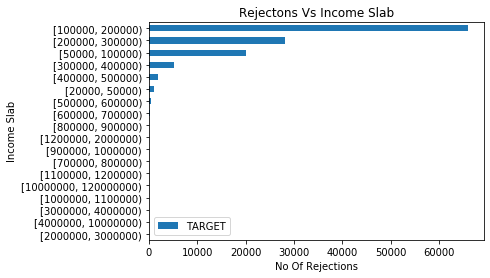

In [50]:
df_final.pivot_table("TARGET",index="CAT",aggfunc=np.sum).sort_values(by="TARGET",ascending=True).plot(kind="barh")
plt.xlabel("No Of Rejections")
plt.ylabel("Income Slab") # [100000,200000) Income group have maximum number of rejections
plt.title("Rejectons Vs Income Slab")

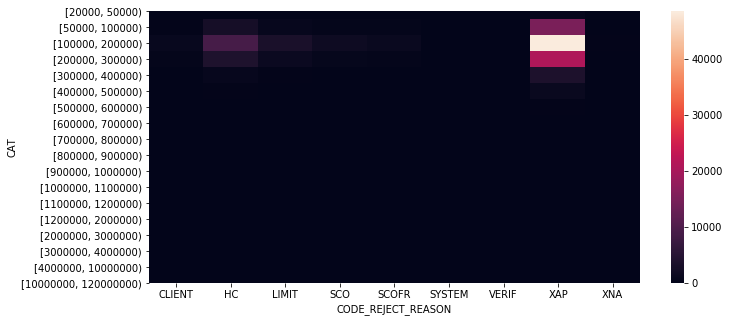

In [51]:
plt.figure(figsize=(11,5))
sns.heatmap(df_final.pivot_table("TARGET",index="CAT",columns="CODE_REJECT_REASON",aggfunc=np.sum,fill_value=0))
#XAP code is major reason of rejection 48585 numbers- However not given the explanation of XAP in CODE_REJECT_REASON

In [52]:
#df_final.pivot_table("TARGET",index="CAT",columns="CODE_REJECT_REASON",aggfunc=np.sum,fill_value=0)

In [53]:
df_final["InCrRatio"] = df_final["AMT_CREDIT"]/df_final["AMT_INCOME_TOTAL"]

In [54]:
qt=pd.qcut(df_final["InCrRatio"],4)

In [55]:
df_final.groupby([qt,"TARGET"])["TARGET"].count().unstack()

TARGET,0,1
InCrRatio,,
"(0.00381, 1.991]",328260,29317
"(1.991, 3.086]",324493,33058
"(3.086, 4.954]",324720,32841
"(4.954, 84.737]",329342,28124


In [56]:
#df_final[study1].isnull().sum()/df_final[study1].isnull().sum().sum()*100

In [57]:
df_study = dfap[['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                     'REGION_POPULATION_RELATIVE','TARGET',
                 'SK_ID_CURR','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT_W_CITY']]

In [58]:
df_study.head()

,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,TARGET,SK_ID_CURR,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY
0,0,1.0,202500.0,406597.5,24700.5,351000.0,0.018801,1,100002,0.018801,2
1,0,2.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,0,100003,0.003541,1
2,0,1.0,67500.0,135000.0,6750.0,135000.0,0.010032,0,100004,0.010032,2
3,0,2.0,135000.0,312682.5,29686.5,297000.0,0.008019,0,100006,0.008019,2
4,0,1.0,121500.0,513000.0,21865.5,513000.0,0.028663,0,100007,0.028663,2


In [59]:
df_study.isnull().sum()/df_study["SK_ID_CURR"].count() *100 # Missing Percentage is lesser than 13 % in these columns

CNT_CHILDREN                   0.000000
CNT_FAM_MEMBERS                0.000650
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
REGION_POPULATION_RELATIVE     0.000000
TARGET                         0.000000
SK_ID_CURR                     0.000000
REGION_POPULATION_RELATIVE     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
dtype: float64

In [60]:
df_study1 = dfap[['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                     'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT_W_CITY','TARGET']]

In [61]:
df_study1.head()

,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,TARGET
0,0,1.0,202500.0,406597.5,24700.5,351000.0,0.018801,2,1
1,0,2.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1,0
2,0,1.0,67500.0,135000.0,6750.0,135000.0,0.010032,2,0
3,0,2.0,135000.0,312682.5,29686.5,297000.0,0.008019,2,0
4,0,1.0,121500.0,513000.0,21865.5,513000.0,0.028663,2,0


In [62]:
df_study10 = df_study1[df_study1["TARGET"]==0]

In [63]:
df_10 = df_study10[['CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                     'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT_W_CITY']]

In [64]:
df_10.head()

,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY
1,0,2.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,1
2,0,1.0,67500.0,135000.0,6750.0,135000.0,0.010032,2
3,0,2.0,135000.0,312682.5,29686.5,297000.0,0.008019,2
4,0,1.0,121500.0,513000.0,21865.5,513000.0,0.028663,2
5,0,2.0,99000.0,490495.5,27517.5,454500.0,0.035792,2


In [65]:
corr_matrix = df_10.corr()

In [66]:
corr_matrix

,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY
CNT_CHILDREN,1.000000,0.878571,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.021866
CNT_FAM_MEMBERS,0.878571,1.000000,0.034256,0.064536,0.075787,0.062814,-0.023425,0.028657
AMT_INCOME_TOTAL,0.027397,0.034256,1.000000,0.342799,0.418953,0.349462,0.167851,-0.200466
AMT_CREDIT,0.003081,0.064536,0.342799,1.000000,0.771309,0.987250,0.100604,-0.112238
AMT_ANNUITY,0.020905,0.075787,0.418953,0.771309,1.000000,0.776686,0.120988,-0.145153
AMT_GOODS_PRICE,-0.000525,0.062814,0.349462,0.987250,0.776686,1.000000,0.103827,-0.112601
REGION_POPULATION_RELATIVE,-0.024363,-0.023425,0.167851,0.100604,0.120988,0.103827,1.000000,-0.537301
REGION_RATING_CLIENT_W_CITY,0.021866,0.028657,-0.200466,-0.112238,-0.145153,-0.112601,-0.537301,1.000000


In [67]:
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [68]:
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']

In [69]:
corrdf

,Var1,Var2,Correlation
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,CNT_FAM_MEMBERS,NaN
2,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
3,CNT_CHILDREN,AMT_CREDIT,NaN
4,CNT_CHILDREN,AMT_ANNUITY,NaN
...,...,...,...
59,REGION_RATING_CLIENT_W_CITY,AMT_CREDIT,-0.112238
60,REGION_RATING_CLIENT_W_CITY,AMT_ANNUITY,-0.145153
61,REGION_RATING_CLIENT_W_CITY,AMT_GOODS_PRICE,-0.112601
62,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.537301


In [70]:
corrdf.dropna(subset = ['Correlation'], inplace = True)

In [71]:
corrdf.Correlation = abs(corrdf.Correlation)
corrdf.sort_values('Correlation', ascending = False)[:10]

,Var1,Var2,Correlation
43,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
8,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
44,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
35,AMT_ANNUITY,AMT_CREDIT,0.771309
62,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537301
34,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
42,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
26,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
58,REGION_RATING_CLIENT_W_CITY,AMT_INCOME_TOTAL,0.200466
50,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.167851


In [72]:
df_study11 = df_study1[df_study1["TARGET"]==1]

In [73]:
corr_matrix1 = df_study11.corr()

In [74]:
corrdf1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))


In [75]:
corrdf1 = corrdf1.unstack().reset_index()

In [76]:
corrdf1.columns = ['Var1', 'Var2', 'Correlation']
corrdf1

,Var1,Var2,Correlation
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,CNT_FAM_MEMBERS,NaN
2,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
3,CNT_CHILDREN,AMT_CREDIT,NaN
4,CNT_CHILDREN,AMT_ANNUITY,NaN
...,...,...,...
76,TARGET,AMT_ANNUITY,NaN
77,TARGET,AMT_GOODS_PRICE,NaN
78,TARGET,REGION_POPULATION_RELATIVE,NaN
79,TARGET,REGION_RATING_CLIENT_W_CITY,NaN


In [77]:
corrdf1.dropna(subset = ['Correlation'], inplace = True)

In [78]:
corrdf1.Correlation = abs(corrdf1.Correlation)
corrdf1.sort_values('Correlation', ascending = False)[:10] # Top 10 Correlation for class 1

,Var1,Var2,Correlation
48,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
9,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
49,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
39,AMT_ANNUITY,AMT_CREDIT,0.752195
69,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.446977
67,REGION_RATING_CLIENT_W_CITY,AMT_ANNUITY,0.089291
68,REGION_RATING_CLIENT_W_CITY,AMT_GOODS_PRICE,0.077191
59,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.076049
37,AMT_ANNUITY,CNT_FAM_MEMBERS,0.075711
58,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.071690


In [79]:
corrdf.sort_values('Correlation', ascending = False)[:10] # Top 10 Correlation for 0 class

,Var1,Var2,Correlation
43,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
8,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
44,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
35,AMT_ANNUITY,AMT_CREDIT,0.771309
62,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537301
34,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
42,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
26,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
58,REGION_RATING_CLIENT_W_CITY,AMT_INCOME_TOTAL,0.200466
50,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.167851
